In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline
from skimage.io import imread, imsave
from skimage.util import *

import sys, os
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

Setting environment for Local Macbook Pro


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/home/yuncong/CSHL_data_processed/MD585/MD585_prep2_thumbnail/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD590/MD590_prep2_thumbnail/MD590-IHC17-2015.08.10-19.09.09_MD590_2_0050_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD591/MD591_prep2_thumbnail/MD591-IHC17-2015.08.28-04.23.47_MD591_1_0049_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD592/MD592_prep2_thumbnail/MD592-N16-2015.08.22-00.50.39_MD592_2_0047_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD593/MD593_prep2_thumbnail/MD593-N15-2015.08.21-16.53.02_MD593_3_0045_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD594/MD594_prep2_thumbnail/MD594-IHC16-2015.08.26-16.11.01_MD594_1_0046_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD595/MD595_prep2_thumbnail/MD595-IHC12-2015.09.15-01.21.39_MD595_2_0035_prep2_thumbn

In [ ]:
import vtk
from vtk.util import numpy_support
from vis3d_utilities import *

In [2]:
import nrrd
import numpy as np
import matplotlib.pyplot as plt

rootdir = '/home/yuncong/AtlasData/Allen/'

In [3]:
NISSL, metaNISSL = nrrd.read(rootdir + 'ara_nissl_10.nrrd');
# shape = (1320, 800, 1140)
nissl = img_as_ubyte(NISSL / NISSL.max())
nissl = np.transpose(nissl, axes=[1,0,2])
nissl = 255 - nissl

del NISSL

/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [7]:
AVGT, metaAVGT = nrrd.read(rootdir + 'average_template_10.nrrd');
# shape = (1320, 800, 1140)
average_template = img_as_ubyte(AVGT / float(AVGT.max()))
average_template = np.transpose(average_template, axes=[1,0,2])

del AVGT

/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [14]:
MD589_volume = DataManager.load_intensity_volume_v2('MD589', prep_id=4)
t = time.time()
MD589_volume_rescaled = rescale_by_resampling(MD589_volume, 10./XY_PIXEL_DISTANCE_TB ) # Make both volumes 10um resolution.
print time.time() - t
MD589_volume_rescaled = img_as_ubyte(MD589_volume_rescaled)
del MD589_volume

1.57407903671


In [66]:
a = actor_volume(average_template[::10, ::10, ::10], what='tb', tb_opacity=0.1)
launch_vtk([a])

In [23]:
nissl.shape

(800, 1320, 1140)

In [27]:
a = actor_volume(nissl[::1, ::1, 300:800:1], what='tb', 
                 white_more_transparent=False, tb_opacity=0.4)
launch_vtk([a], 
           view_up=[-0.153261, -0.911808, -0.380943], 
           focal=[251.939874, 145.673545, 98.934590],
            position=[694.796558, 425.628118, -749.322604])

In [19]:
MD589_volume_rescaled.shape

(416, 751, 258)

In [22]:
a = actor_volume(MD589_volume_rescaled[:, :600, :], what='tb', tb_opacity=0.2)
launch_vtk([a])

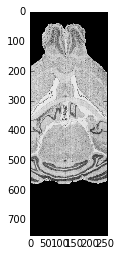

In [36]:
plt.imshow(MD589_volume_rescaled[100, :, :], cmap=plt.cm.gray);